In [12]:
import pandas as pd
import numpy as np

import preprocessing as pre
import slicing
import resample

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [13]:
#supress warining (can be turned off)
warnings.filterwarnings('ignore')

In [14]:
# Set correct channel names: 
eeg_list = ['time', 'L1', 'L2', 'L3', 'L4', 'L7', 'L8', 'L9', 'L10', 'R1', 'R2', 'R3', 'R5', 'R7', 'R8', 'R9', 'R10']

In [15]:
#load raw eeg data as pd.DataFrame

df_lukas = pd.read_csv('eeg_data/Lukas.txt',header=[0],sep=',')
df_david = pd.read_csv('eeg_data/David.txt', header=[0], sep=',')
#add into list
org_dfs = [df_lukas, df_david]

In [16]:
#list with relevent columns
rel_columns = [' Timestamp', ' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', 
                ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7', ' EXG Channel 8', ' EXG Channel 9', ' EXG Channel 10', 
                ' EXG Channel 11', ' EXG Channel 12', ' EXG Channel 13', ' EXG Channel 14', ' EXG Channel 15']
#select relevent columns for both routines
prepared_lukas = df_lukas[rel_columns]
eeg_lukas = prepared_lukas.set_axis(eeg_list, axis=1, inplace=False)

prepared_david = df_david[rel_columns]
eeg_david = prepared_david.set_axis(eeg_list, axis=1, inplace=False)

In [17]:
#print shape of prepared dfs and put into list
print('Shape of EEG data David: ' + str(eeg_david.shape))
print('Shape of EEG data Lukas: ' + str(eeg_lukas.shape))

eeg_list = [eeg_lukas, eeg_david]

Shape of EEG data David: (202925, 17)
Shape of EEG data Lukas: (213438, 17)


## Cleaning the signals

Creating RawArray with float64 data, n_channels=16, n_times=213438
    Range : 0 ... 213437 =      0.000 ...  1707.496 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 62 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 62.00 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 62.25 Hz)
- Filter length: 825 samples (6.600 sec)



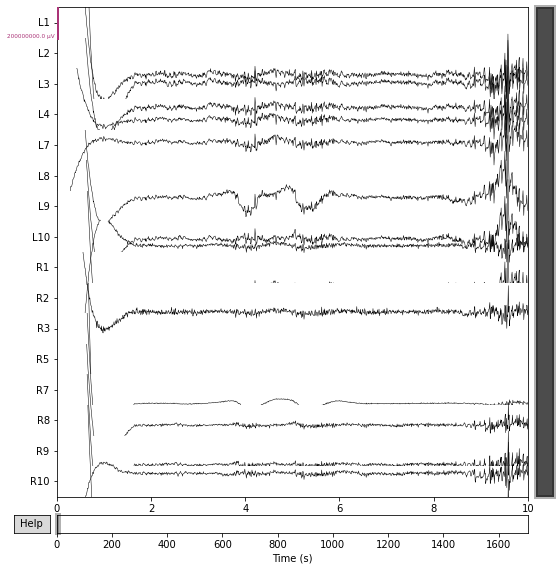

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 825 samples (6.600 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 62 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 62.49 Hz
- Upper transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 41251 samples (330.008 sec)

Setting up high-pass filter at 1 Hz

FIR filter parameters


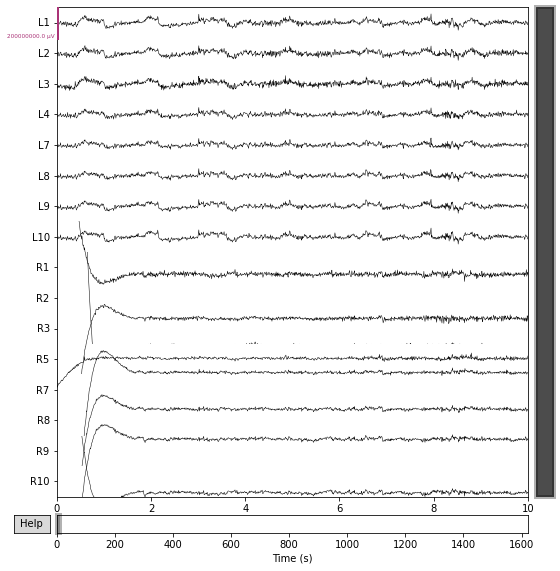

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 825 samples (6.600 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 62 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 62.49 Hz
- Upper transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 62.50 Hz)
- Filter length: 41251 samples (330.008 sec)

Setting up high-pass filter at 1 Hz

FIR filter parameters


In [18]:
#cleaning signals and saving to list
cleaned_mne_objects = []

for df in eeg_list:
    cleaned_object = pre.clean_signals(df)
    cleaned_mne_objects.append(cleaned_object)

In [19]:
#calculating ica components and appending them as channels
cleaned_mne_objects_withIC = pre.ica_whole_signal(cleaned_signals = cleaned_mne_objects, components = 3)

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 3 components
Fitting ICA took 0.6s.
Creating RawArray with float64 data, n_channels=19, n_times=213438
    Range : 0 ... 213437 =      0.000 ...  1707.496 secs
Ready.
Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 3 components
Fitting ICA took 0.4s.
Creating RawArray with float64 data, n_channels=19, n_times=202925
    Range : 0 ... 202924 =      0.000 ...  1623.392 secs
Ready.


## Cutting the preprocessed signals into single activities

### cutting with original signals

In [20]:
list_dfs_with_timestamps = slicing.append_timestamps(cleaned_mne_objects, org_dfs)
list_dfs_with_timestamps_ic = slicing.append_timestamps(cleaned_mne_objects_withIC, org_dfs)

In [21]:
#connecting the individual dataframes (Lukas, David) into one DataFrame
connected_df = list_dfs_with_timestamps[0].append(list_dfs_with_timestamps[1], ignore_index=True)
connected_df_withic = list_dfs_with_timestamps_ic[0].append(list_dfs_with_timestamps_ic[1], ignore_index = True)

In [22]:
#extract the single activities from the full routine
experiment_data = slicing.import_experiment_data()

sensor_data = slicing.convert_timestamps(connected_df)

routines = slicing.get_routine_times(experiment_data)

routines_data_dict = slicing.slice_data(routines, sensor_data)

In [23]:
#extract the single activities from the full routine for signal with ic
experiment_data = slicing.import_experiment_data()

sensor_data = slicing.convert_timestamps(connected_df_withic)

routines_data_dict_withic = slicing.slice_data(routines, sensor_data)

In [24]:
#show one closed routine
routines_data_dict["yawning"][0].head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
124116,-4.197663,-3.867793,-8.628011,-6.118014,7.109658,9.068408,6.631348,-5.713238,-7.606092,-9.304030,-7.753830,-3.283174,-0.004409,-4.076200,-4.740995,-5.852504,1
124117,5.520972,6.291969,-0.734734,5.314743,17.057739,19.514087,19.172939,6.813413,6.260873,-0.686273,1.116674,8.530706,12.950178,8.142677,6.020298,3.675480,1
124118,6.653932,6.689267,-2.168815,-0.812574,11.719693,17.494541,20.506213,9.292964,11.179359,7.022566,7.365024,11.101668,14.553540,12.239148,11.253188,9.080135,1
124119,-7.803473,-9.350220,-12.490082,-3.320201,-2.583133,5.751891,6.285624,-3.960239,6.454883,5.747541,5.704918,5.199500,5.650154,4.738974,4.977136,4.467574,1
124120,-19.503058,-20.599949,-19.551085,-15.472061,-14.315445,-8.446613,-12.012784,-22.429908,-3.324410,-11.030901,-10.382738,-5.041737,-1.816466,-6.236495,-6.583435,-7.057835,1
124121,0.980778,1.647031,2.392164,4.383516,10.286604,15.060018,11.128268,-0.715562,-3.386152,-4.394607,-2.205603,0.001781,1.702394,-1.673251,-3.783285,-5.829021,1
124122,-7.829614,-6.233074,-11.673374,-3.442663,0.951038,7.376958,10.472762,-1.103543,13.683071,15.952747,15.767510,12.304454,11.215850,11.570753,9.931009,8.435885,1
124123,-4.467798,-3.962197,-8.420027,-1.480258,6.136209,9.644252,1.162438,-6.791462,9.550001,-4.006699,-8.945867,0.159577,7.757783,6.761158,7.819366,7.701504,1
124124,-2.810864,-1.364023,-5.087039,-2.181662,2.526795,6.810966,-0.665146,-8.258255,13.116573,20.526012,20.943014,12.723089,7.539228,3.502299,-2.010246,-1.726300,1
124125,0.047012,0.870839,-5.828847,-1.830635,0.147942,6.153836,0.540367,-4.407980,15.068276,11.552717,9.482094,9.405499,9.998995,7.951555,4.957609,4.493528,1


In [25]:
routines_data_dict_withic["yawning"][0].head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,target
124116,-4.197663,-3.867793,-8.628011,-6.118014,7.109658,9.068408,6.631348,-5.713238,-7.606092,-9.304030,-7.753830,-3.283174,-0.004409,-4.076200,-4.740995,-5.852504,0.048051,0.184757,0.081376,1
124117,5.520972,6.291969,-0.734734,5.314743,17.057739,19.514087,19.172939,6.813413,6.260873,-0.686273,1.116674,8.530706,12.950178,8.142677,6.020298,3.675480,0.002229,0.227236,-0.229255,1
124118,6.653932,6.689267,-2.168815,-0.812574,11.719693,17.494541,20.506213,9.292964,11.179359,7.022566,7.365024,11.101668,14.553540,12.239148,11.253188,9.080135,-0.010416,0.082548,-0.359351,1
124119,-7.803473,-9.350220,-12.490082,-3.320201,-2.583133,5.751891,6.285624,-3.960239,6.454883,5.747541,5.704918,5.199500,5.650154,4.738974,4.977136,4.467574,0.033820,-0.129067,-0.191129,1
124120,-19.503058,-20.599949,-19.551085,-15.472061,-14.315445,-8.446613,-12.012784,-22.429908,-3.324410,-11.030901,-10.382738,-5.041737,-1.816466,-6.236495,-6.583435,-7.057835,0.075000,-0.172088,0.280788,1
124121,0.980778,1.647031,2.392164,4.383516,10.286604,15.060018,11.128268,-0.715562,-3.386152,-4.394607,-2.205603,0.001781,1.702394,-1.673251,-3.783285,-5.829021,0.031118,0.240182,-0.054290,1
124122,-7.829614,-6.233074,-11.673374,-3.442663,0.951038,7.376958,10.472762,-1.103543,13.683071,15.952747,15.767510,12.304454,11.215850,11.570753,9.931009,8.435885,0.016618,-0.252139,-0.410116,1
124123,-4.467798,-3.962197,-8.420027,-1.480258,6.136209,9.644252,1.162438,-6.791462,9.550001,-4.006699,-8.945867,0.159577,7.757783,6.761158,7.819366,7.701504,0.046493,0.051765,-0.058237,1
124124,-2.810864,-1.364023,-5.087039,-2.181662,2.526795,6.810966,-0.665146,-8.258255,13.116573,20.526012,20.943014,12.723089,7.539228,3.502299,-2.010246,-1.726300,0.016250,-0.325347,-0.386220,1
124125,0.047012,0.870839,-5.828847,-1.830635,0.147942,6.153836,0.540367,-4.407980,15.068276,11.552717,9.482094,9.405499,9.998995,7.951555,4.957609,4.493528,0.009554,-0.203356,-0.266709,1


## Generating the feature vectors

In [26]:
#generating feature sets
featureset1 = pre.generate_featureSet1(data = routines_data_dict)
featureset2 = pre.generate_featureSet1(data = routines_data_dict_withic)

None

Feature Set 1 successfully generated..
Shape of generated Feature Set as pandas DataFrame= (1840, 129)
Feature Set 1 successfully generated..
Shape of generated Feature Set as pandas DataFrame= (1840, 153)


In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components = 3)
reduced = pca.fit_transform(featureset2.iloc[:, :-1])
reduced = normalize(X = reduced)
reduced = pd.DataFrame(reduced)
enc = LabelEncoder()

lab = enc.fit_transform(featureset2.iloc[:, -1].values.tolist())

reduced['Label'] = lab


In [84]:
sub_fe = reduced.sample(frac = 1)

sub_fe.shape

(1840, 4)

In [77]:
sub_fe['Label']

133     5
965     1
1127    4
1128    4
407     6
       ..
76      5
970     1
1136    4
605     2
1221    0
Name: Label, Length: 920, dtype: int64

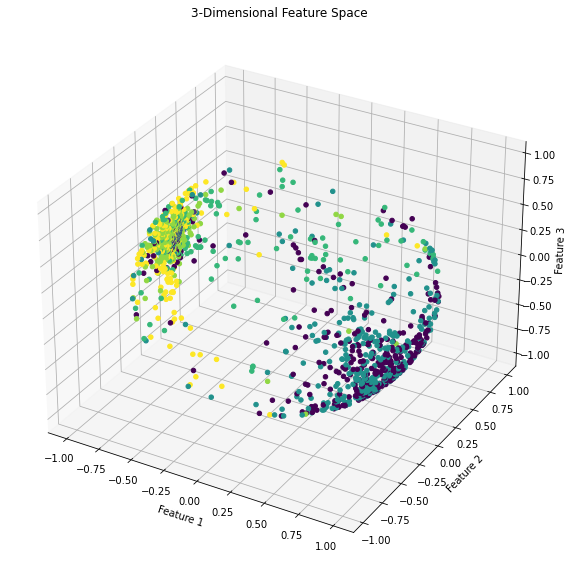

In [91]:

fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(projection='3d')

ax.scatter(xs = sub_fe[0], ys = sub_fe[1], zs = sub_fe[2], c = sub_fe['Label'], alpha =1)

ax.set_title("3-Dimensional Feature Space")

ax.set_xlabel("Feature 1")

ax.set_ylabel("Feature 2")

ax.set_zlabel("Feature 3")
#ax.legend(loc = 'best')
#ax.grid(False)
plt.show()

fig = fig.get_figure()

fig.savefig("3-dimensional-space.png") 

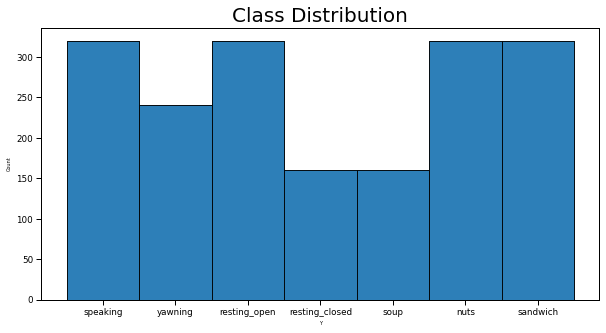

In [19]:
#plot class distribution

fig_dims = (10, 5)
plt.figure(figsize=fig_dims)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})
fig = sns.histplot(data = featureset1['Y'], palette=("Blues_d"))
chart = sns.histplot(data = featureset1['Y'], palette=("Blues_d"))
chart.axes.set_title("Class Distribution", fontsize = 20)
#chart.set_xlabel(fontsize = 1)



None

In [21]:
fig = fig.get_figure()

fig.savefig("class_distribution.png") 

### resampling data with SMOTE  to account for imbalance

In [17]:
#resample feature vector
res_featureSet1 = resample.resample_SMOTE(featureset1)
print()
res_featureSet2 = resample.resample_SMOTE(featureset2)


Original dataset shape Counter({'speaking': 320, 'resting_open': 320, 'nuts': 320, 'sandwich': 320, 'yawning': 240, 'resting_closed': 160, 'soup': 160})
Resampled dataset shape Counter({'speaking': 320, 'yawning': 320, 'resting_open': 320, 'resting_closed': 320, 'soup': 320, 'nuts': 320, 'sandwich': 320})

Original dataset shape Counter({'speaking': 320, 'resting_open': 320, 'nuts': 320, 'sandwich': 320, 'yawning': 240, 'resting_closed': 160, 'soup': 160})
Resampled dataset shape Counter({'speaking': 320, 'yawning': 320, 'resting_open': 320, 'resting_closed': 320, 'soup': 320, 'nuts': 320, 'sandwich': 320})


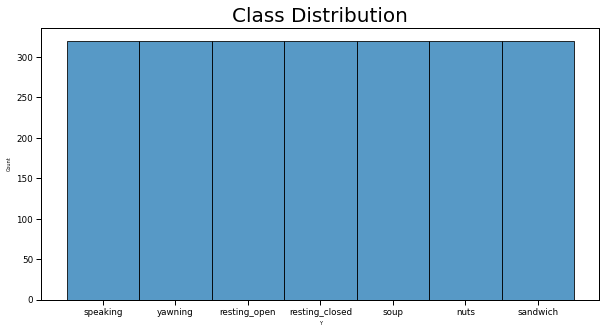

In [18]:
#plot class distribution resampled

fig_dims = (10, 5)
plt.figure(figsize=fig_dims)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})

chart = sns.histplot(data = res_featureSet1['Y'], palette=("Blues_d"))
chart.axes.set_title("Class Distribution", fontsize = 20)
#chart.set_xlabel(fontsize = 1)



None

## Saving generated sets as Pickle

In [19]:
# saving to pickle
path_res = './data/resampled/'
path_org = './data/org_sets/'

res_featureSet1.to_pickle(path = path_res + 'featureSet1.pkl')
res_featureSet2.to_pickle(path = path_res + 'featureSet2.pkl')

featureset1.to_pickle(path = path_org + "featureSet1.pkl")
featureset2.to_pickle(path = path_org + "featureSet2.pkl")

In [20]:
from sklearn.model_selection import train_test_split

X = res_featureSet2.iloc[:, :-1]
y = res_featureSet2.iloc[:, -1]

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

model = RandomForestClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

(2240, 152)
(2240,)
0.8527027027027027
